<a href="https://colab.research.google.com/github/abhi011097/Kaggle_Notebooks/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(5)
data_x = np.linspace(-10.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)
# data_y = 40*data_x + 20* np.random.randn(100, 1)  # creating your data
data_x /= np.max(data_x) #scaling
data_x

array([[-1.        ],
       [-0.97979798],
       [-0.95959596],
       [-0.93939394],
       [-0.91919192],
       [-0.8989899 ],
       [-0.87878788],
       [-0.85858586],
       [-0.83838384],
       [-0.81818182],
       [-0.7979798 ],
       [-0.77777778],
       [-0.75757576],
       [-0.73737374],
       [-0.71717172],
       [-0.6969697 ],
       [-0.67676768],
       [-0.65656566],
       [-0.63636364],
       [-0.61616162],
       [-0.5959596 ],
       [-0.57575758],
       [-0.55555556],
       [-0.53535354],
       [-0.51515152],
       [-0.49494949],
       [-0.47474747],
       [-0.45454545],
       [-0.43434343],
       [-0.41414141],
       [-0.39393939],
       [-0.37373737],
       [-0.35353535],
       [-0.33333333],
       [-0.31313131],
       [-0.29292929],
       [-0.27272727],
       [-0.25252525],
       [-0.23232323],
       [-0.21212121],
       [-0.19191919],
       [-0.17171717],
       [-0.15151515],
       [-0.13131313],
       [-0.11111111],
       [-0

In [ ]:
from scipy import stats
a = np.array([0,1,2,3,4,5,6, 23, 19, 11])
b = np.array([0, 1, 4, 9, 16, 25, 36, 144, 225, 196])
stats.pearsonr(a,b)

PearsonRResult(statistic=0.8615898239550396, pvalue=0.0013540376408062698)

In [ ]:
a = np.array([0,1,2,7,8])
b = np.array([11, 19, 23, 31, 39])
stats.pearsonr(a,b)

(0.9590573057149805, 0.009883555244098246)

In [ ]:
stats.pearsonr(data_x.reshape(100,),data_y.reshape(100,))

(0.040603274375516946, 0.6883513744353564)

In [ ]:
data_x = np.hstack((np.ones_like(data_x), data_x))
data_x

array([[ 1.        , -1.        ],
       [ 1.        , -0.97979798],
       [ 1.        , -0.95959596],
       [ 1.        , -0.93939394],
       [ 1.        , -0.91919192],
       [ 1.        , -0.8989899 ],
       [ 1.        , -0.87878788],
       [ 1.        , -0.85858586],
       [ 1.        , -0.83838384],
       [ 1.        , -0.81818182],
       [ 1.        , -0.7979798 ],
       [ 1.        , -0.77777778],
       [ 1.        , -0.75757576],
       [ 1.        , -0.73737374],
       [ 1.        , -0.71717172],
       [ 1.        , -0.6969697 ],
       [ 1.        , -0.67676768],
       [ 1.        , -0.65656566],
       [ 1.        , -0.63636364],
       [ 1.        , -0.61616162],
       [ 1.        , -0.5959596 ],
       [ 1.        , -0.57575758],
       [ 1.        , -0.55555556],
       [ 1.        , -0.53535354],
       [ 1.        , -0.51515152],
       [ 1.        , -0.49494949],
       [ 1.        , -0.47474747],
       [ 1.        , -0.45454545],
       [ 1.        ,

In [ ]:
order = np.random.permutation(len(data_x))
portion = 20
test_x = data_x[order[:portion]]
test_y = data_y[order[:portion]]
train_x = data_x[order[portion:]]
train_y = data_y[order[portion:]]
print(order)
print (test_x.shape, train_x.size, test_y.size, train_y.size)
print (test_x)

[56 34 87 24 27 92 67 43 65 69 12 59 47 62 72 40 44 80 46 29 77  0 52 84
 58 93 88 33 19 61 90 51 49 13 39 36 50 16 22 63 66 25 57 20 97 91 76 11
 82 53 15 81 73 17 48 32 60 10 21 42  4 96 78 70 79 68  9 74  7  6 94 30
  1 37 86 95 71 18 38 54  2 85 23  3 55 89 35 75 98 83 41 26  5 45 31 99
 14  8 28 64]
(20, 2) 160 20 80
[[ 1.          0.13131313]
 [ 1.         -0.31313131]
 [ 1.          0.75757576]
 [ 1.         -0.51515152]
 [ 1.         -0.45454545]
 [ 1.          0.85858586]
 [ 1.          0.35353535]
 [ 1.         -0.13131313]
 [ 1.          0.31313131]
 [ 1.          0.39393939]
 [ 1.         -0.75757576]
 [ 1.          0.19191919]
 [ 1.         -0.05050505]
 [ 1.          0.25252525]
 [ 1.          0.45454545]
 [ 1.         -0.19191919]
 [ 1.         -0.11111111]
 [ 1.          0.61616162]
 [ 1.         -0.07070707]
 [ 1.         -0.41414141]]


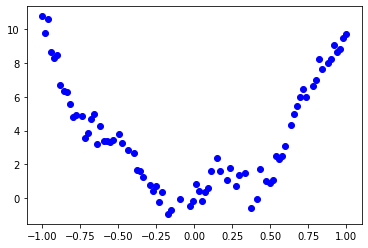

In [ ]:
plt.scatter(train_x[:,1], train_y, c='b', label='Data')
plt.show()

In [ ]:
def get_gradient(w, x, y):
    y_estimate = (np.power(x,2).dot(w)).flatten() #hypothesis
    error = (y.flatten() - y_estimate) 
    mse = (1.0/len(x))*np.sum(np.power(error,2)) # mse
    gradient = -(1.0/len(x)) * error.dot(np.power(x,2))         # gradient
    return gradient, mse

In [ ]:
w = np.random.randn(2) # Random Intialization
alpha = 0.4 # learning rate
tolerance = 1e-3 # param for stopping the loop
print("Intial values of Weights:")
print(w[1], w[0])
# Perform Gradient Descent
iterations = 1
while True:
    gradient, error = get_gradient(w, train_x, train_y)
    new_w = w - alpha * gradient
#     print(gradient)
    
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print ("Converged")
        break
    
    # Print error every 10 iterations
    if iterations % 10 == 0:
        print ("Iteration: %d - Error: %.4f" %(iterations, error))
        print ("Updated Weights : {:f} , {:f}".format(w[1], w[0]))
    iterations += 1
    w = new_w

print ("Final Weights : {:f} , {:f}".format(w[1], w[0]))
print ("Test Cost =", get_gradient(w, test_x, test_y)[1])

Intial values of Weights:
0.5218494903163309 0.3056001722083279
Iteration: 10 - Error: 4.2123
Updated Weights : 3.935293 , 2.504557
Iteration: 20 - Error: 2.4952
Updated Weights : 5.659372 , 1.806790
Iteration: 30 - Error: 1.6308
Updated Weights : 6.879349 , 1.303471
Iteration: 40 - Error: 1.1956
Updated Weights : 7.745004 , 0.946314
Iteration: 50 - Error: 0.9764
Updated Weights : 8.359249 , 0.692884
Iteration: 60 - Error: 0.8661
Updated Weights : 8.795101 , 0.513057
Iteration: 70 - Error: 0.8105
Updated Weights : 9.104370 , 0.385457
Iteration: 80 - Error: 0.7825
Updated Weights : 9.323818 , 0.294915
Iteration: 90 - Error: 0.7685
Updated Weights : 9.479533 , 0.230670
Iteration: 100 - Error: 0.7614
Updated Weights : 9.590024 , 0.185082
Iteration: 110 - Error: 0.7578
Updated Weights : 9.668426 , 0.152735
Iteration: 120 - Error: 0.7560
Updated Weights : 9.724057 , 0.129782
Iteration: 130 - Error: 0.7551
Updated Weights : 9.763532 , 0.113495
Iteration: 140 - Error: 0.7546
Updated Weights :

In [ ]:
print("Final eqn / hypothesis looks like:")
print('y = {:f}.x^2 + {:f}'.format(w[1], w[0]))

Final eqn / hypothesis looks like:
y = 9.839381.x^2 + 0.082201


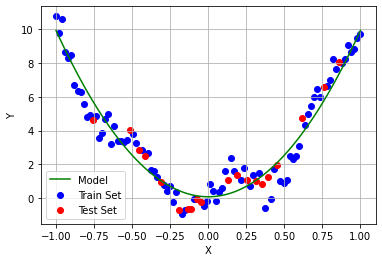

In [ ]:
plt.plot(data_x[:,1], (data_x**2).dot(w), c='g', label='Model')
plt.scatter(train_x[:,1], train_y, c='b', label='Train Set')
plt.scatter(test_x[:,1], test_y, c='r', label='Test Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
w # trained model contains values of weights/parameters

array([0.08220099, 9.83938139])

In [ ]:
x_val = 15.4

x_val = x_val/10

w[1] * x_val + w[0] # prediction. No change is caused to parameters here

15.23484832147311